In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Application data: Data Cleaning and Replacing Missing Values

In [ ]:
null_data= df.isnull().sum()
null_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
null_data1 = df.isnull().sum()/891*100
null_data1

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
threshold = 70
drop_col1=null_data1[null_data1>threshold].index

In [ ]:
drop_col1.size

1

In [ ]:
df_filtered= df.drop(columns=drop_col1)

In [ ]:
df_filtered.shape

(891, 11)

In [ ]:
df_filtered.isnull().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
dtype: int64

In [ ]:
df_filtered['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df_filtered['Embarked'].mode

<bound method Series.mode of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [ ]:
df_filtered['Embarked'].fillna('S',inplace=True )

In [ ]:
df_filtered['Embarked'].isnull().sum()

0

In [ ]:
df_filtered['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df_filtered['Age'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [ ]:
df_filtered['Age'].fillna(22.0, inplace=True)

In [ ]:
df_filtered['Age'].isnull().sum()

0

In [ ]:
df_filtered.isnull().sum().sort_values(ascending=True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
numerical_col = df.select_dtypes(include='number').columns
numerical_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
df_filtered.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
df_filtered.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [ ]:
df_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
class_counts = df_filtered['SibSp'].value_counts()
 #counts the occurrences of each unique value in the 'TARGET' column.Calculates the imbalance ratio by dividing the count of the majority class
imbalance_ratio = class_counts[0] / class_counts[1]
#Calculates the imbalance ratio by dividing the count of the majority class

"Imbalance Ratio:", imbalance_ratio

('Imbalance Ratio:', 2.909090909090909)

In [ ]:
df_fil = df_filtered['SibSp'].value_counts()
#Counts the occurrences of each unique value in the 'TARGET' column, which typically represents the counts of 0s and 1s in a binary classification problem.
class_counts = df_fil
#Assigns the class counts to the variable class_counts.
imbalance_ratio = class_counts[0] / class_counts[1]

"Imbalance Ratio: 1:{:.0f}".format(imbalance_ratio)

'Imbalance Ratio: 1:3'

In [ ]:
df_fil = df_filtered['SibSp'].value_counts()

total_instances =df_fil.sum()

for target, count in df_fil.items():
    percentage = (count / total_instances)*100
    print("{} = {:.2f}%".format(target, percentage))

#Iterates over the items in the 'app_data_fil' series, where 'target' is the class (0 or 1) and 'count' is the count of instances for that class.
#Calculates the percentage of instances for the current class.
#Prints the class and its corresponding percentage with two decimal places.

0 = 68.24%
1 = 23.46%
2 = 3.14%
4 = 2.02%
3 = 1.80%
8 = 0.79%
5 = 0.56%


In [ ]:
df_filtered.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

In [ ]:
numerical_variables = df_filtered.select_dtypes(include = ['float64', 'int64']).columns
numerical_columns = df_filtered[numerical_variables]

#Selects columns in the DataFrame app_data_filtered that have data types 'float64' or 'int64' and retrieves their column names.
#These columns are assumed to be numerical variables
x1 = numerical_columns[numerical_columns['SibSp']==1]
#Creates a new DataFrame (payment_difficulty) containing rows where the 'TARGET' column has a value of 1 (assuming 1 indicates payment difficulty).
all_other = numerical_columns[numerical_columns['SibSp']==0]
#Creates a new DataFrame (all_other) containing rows where the 'TARGET' column

In [ ]:
x1.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
9,10,1,2,14.0,1,0,30.0708
10,11,1,3,4.0,1,1,16.7000
13,14,0,3,39.0,1,5,31.2750
18,19,0,3,31.0,1,0,18.0000
25,26,1,3,38.0,1,5,31.3875
31,32,1,1,22.0,1,0,146.5208
34,35,0,1,28.0,1,0,82.1708


In [ ]:
all_other.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
2,3,1,3,26.0,0,0,7.9250
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,22.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
8,9,1,3,27.0,0,2,11.1333
11,12,1,1,58.0,0,0,26.5500
12,13,0,3,20.0,0,0,8.0500
14,15,0,3,14.0,0,0,7.8542
15,16,1,2,55.0,0,0,16.0000
17,18,1,2,22.0,0,0,13.0000


In [ ]:
correlations_with_sibsp_1 = x1.corr()
# Calculates the correlation matrix for numerical variables in the DataFrame payment_difficulty.
#This matrix shows the correlation coefficients between pairs of numerical variables.
top_10_correlations_with_sibsp_1 = correlations_with_sibsp_1.unstack().sort_values(ascending=False)
#Unstacks the correlation matrix to create a Pandas Series with pairs of variable names as the index and their correlation coefficients as values.
#Then, it sorts the Series in descending order based on correlation coefficients.
top_10_correlations_with_target_1 = top_10_correlations_with_sibsp_1[top_10_correlations_with_sibsp_1.index.get_level_values(0) != top_10_correlations_with_sibsp_1.index.get_level_values(1)]
#Excludes correlations of variables with themselves.
top_10_correlations_with_sibsp_1 = top_10_correlations_with_sibsp_1.head(20)
#Selects the top 20 correlations based on the sorted Series.


top_10_correlations_with_sibsp_1

PassengerId  PassengerId    1.000000
Survived     Survived       1.000000
Parch        Parch          1.000000
Age          Age            1.000000
Pclass       Pclass         1.000000
Fare         Fare           1.000000
             Age            0.264521
Age          Fare           0.264521
Fare         Survived       0.244383
Survived     Fare           0.244383
Parch        Pclass         0.160756
Pclass       Parch          0.160756
Fare         Parch          0.118906
Parch        Fare           0.118906
PassengerId  Fare           0.083009
Fare         PassengerId    0.083009
PassengerId  Parch          0.077934
Parch        PassengerId    0.077934
Survived     PassengerId    0.076032
PassengerId  Survived       0.076032
dtype: float64

In [ ]:
correlations_with_sibsp_0 = all_other.corr()
top_10_correlations_with_sibsp_0 = correlations_with_sibsp_0.unstack().sort_values(ascending=False)
top_10_correlations_with_sibsp_0 = top_10_correlations_with_sibsp_0[top_10_correlations_with_sibsp_0.index.get_level_values(0) != top_10_correlations_with_sibsp_0.index.get_level_values(1)]
top_10_correlations_with_sibsp_0 = top_10_correlations_with_sibsp_0.head(20)

top_10_correlations_with_sibsp_0

Survived     Fare           0.251552
Fare         Survived       0.251552
Survived     Parch          0.183154
Parch        Survived       0.183154
Fare         Parch          0.169745
Parch        Fare           0.169745
Fare         Age            0.113323
Age          Fare           0.113323
PassengerId  Fare           0.016118
Fare         PassengerId    0.016118
Pclass       PassengerId    0.003792
PassengerId  Pclass         0.003792
             Parch         -0.004000
Parch        PassengerId   -0.004000
PassengerId  Age           -0.012097
Age          PassengerId   -0.012097
PassengerId  Survived      -0.041418
Survived     PassengerId   -0.041418
Age          Survived      -0.072069
Survived     Age           -0.072069
dtype: float64

In [ ]:
df.corr()

<ipython-input-82-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

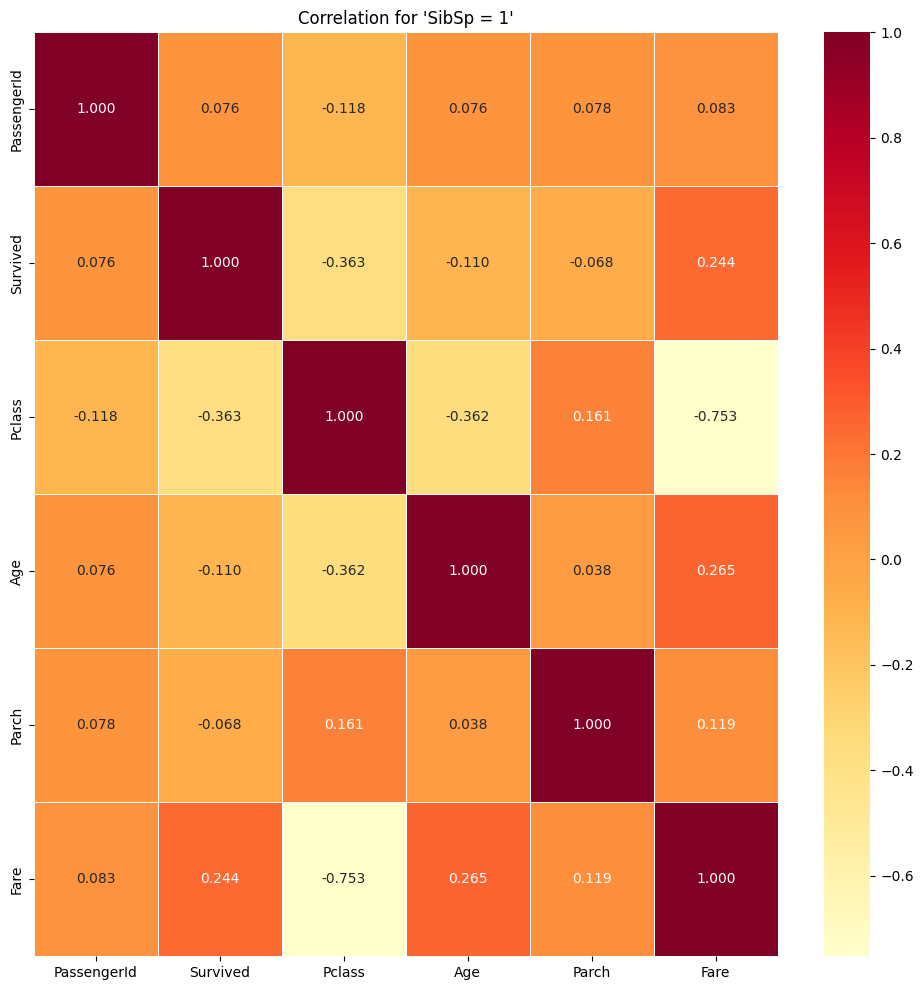

In [ ]:
columns=['PassengerId', 'Survived', 'Pclass', 'Age', 'Parch', 'Fare']
selected_columns=x1[columns]
correlation_matrix = selected_columns.corr()
selected_columns = x1[columns]
#Creates a new DataFrame
correlation_matrix = selected_columns.corr()
#Calculates the correlation matrix for the selected columns.

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.3f', linewidths=0.5)
plt.title("Correlation for 'SibSp = 1'")
plt.show()

In [ ]:
x= df_filtered.drop("SibSp",axis=1)
# Creates a new DataFrame x by dropping the column with the name "TARGET" along the columns (axis=1).
y = df_filtered.SibSp

In [ ]:
x.shape


(891, 10)

In [ ]:
numeric_df=df_filtered.select_dtypes(include=['float64', 'int64'])

In [ ]:
numeric_df = numeric_df.fillna(numeric_df.mean())
#This line of code uses the fillna method to replace missing (NaN) values in numeric_df with the mean value of each column.
#The mean() function calculates the mean for each column, and these mean values are then used to fill in the missing values in the respective columns

In [ ]:
x= numeric_df.drop(columns=['SibSp'])  # Assuming 'TARGET' is your target variable
y = numeric_df['SibSp']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

x_train.shape,x_test.shape

((623, 6), (268, 6))

In [ ]:
x_train.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare
114,115,0,3,17.0,0,14.4583
874,875,1,2,28.0,0,24.0000
76,77,0,3,22.0,0,7.8958
876,877,0,3,20.0,0,9.8458
674,675,0,2,22.0,0,0.0000


In [ ]:
for column in df_filtered.columns:
    print(f"{column}")

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming df_filtered is your DataFrame
df = df_filtered[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

x_train, x_test, y_train, y_test = train_test_split(df.drop('SibSp', axis=1), df['SibSp'], test_size=0.2, random_state=42)

mod3 = RandomForestClassifier(n_estimators=50, random_state=42).fit(x_train, y_train)

y_pred = mod3.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[114  10   0   0   0   0]
 [ 16  26   2   0   0   1]
 [  2   2   0   1   0   0]
 [  0   0   0   3   0   0]
 [  0   0   0   0   2   0]
 [  0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       124
           1       0.68      0.58      0.63        45
           2       0.00      0.00      0.00         5
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0

    accuracy                           0.81       179
   macro avg       0.55      0.58      0.56       179
weighted avg       0.79      0.81      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naives Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming df_filtered is your DataFrame
df = df_filtered[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Assuming 'Survived' is your target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[88 17]
 [37 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77       105
           1       0.69      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming df_filtered is your DataFrame
df = df_filtered[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Assuming 'Survived' is your target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-Nearest Neighbors model with k=5 (you can adjust this)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[87 18]
 [41 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       105
           1       0.65      0.45      0.53        74

    accuracy                           0.67       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.67      0.67      0.66       179



Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming df_filtered is your DataFrame
df = df_filtered[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Assuming 'Survived' is your target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the model
logreg_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[94 11]
 [38 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       105
           1       0.77      0.49      0.60        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.69       179
weighted avg       0.73      0.73      0.71       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
